In [59]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts

## Проектная работа по модулю “Математика и статистика в Python”

# 1.Загрузить файл hr.csv.

In [60]:
data=pd.read_csv("HR.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [62]:
for x in data:
    print(x)
    try:
        print("  Среднее - ",statistics.mean(data[x]))
        print("  Медиана - ",statistics.median(data[x]))
        
        try:
            print("  Мода    - ",statistics.mode(data[x]))
        except:
            print("  Мода    -  отсутствует")
        
        print("  Min/Max - ",min(data[x]),"/",max(data[x]))
        print("  Ср.откл - ",statistics.pstdev(data[x]))
    except:
        print("  не числовой")

satisfaction_level
  Среднее -  0.6128335222348157
  Медиана -  0.64
  Мода    -  0.1
  Min/Max -  0.09 / 1.0
  Ср.откл -  0.2486223626820733
last_evaluation
  Среднее -  0.7161017401160077
  Медиана -  0.72
  Мода    -  0.55
  Min/Max -  0.36 / 1.0
  Ср.откл -  0.1711634045107436
number_project
  Среднее -  3.80305353690246
  Медиана -  4
  Мода    -  4
  Min/Max -  2 / 7
  Ср.откл -  1.2325512654823438
average_montly_hours
  Среднее -  201.0503366891126
  Медиана -  200
  Мода    -  отсутствует
  Min/Max -  96 / 310
  Ср.откл -  49.94143446256218
time_spend_company
  Среднее -  3.498233215547703
  Медиана -  3
  Мода    -  3
  Min/Max -  2 / 10
  Ср.откл -  1.4600875552715114
Work_accident
  Среднее -  0.1446096406427095
  Медиана -  0
  Мода    -  0
  Min/Max -  0 / 1
  Ср.откл -  0.3517068274513532
left
  Среднее -  0.2380825388359224
  Медиана -  0
  Мода    -  0
  Min/Max -  0 / 1
  Ср.откл -  0.42590990072709495
promotion_last_5years
  Среднее -  0.021268084538969265
  Медиана -

# 3.Рассчитать и визуализировать корреляционную матрицу для переменных.

In [63]:
data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


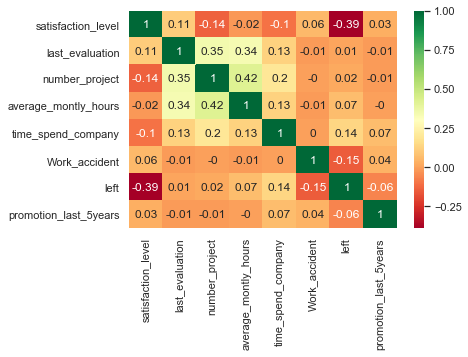

In [64]:
sns.heatmap(data.corr().round(2),annot=True,cmap='RdYlGn')

    по корреляционно матрице видно что есть хорошая связь между уходом и уровнем удовлетворенности,а так же номером проекта и средним временем месячной работы 

# 4.Визуализировать несколько взаимосвязей между переменными.

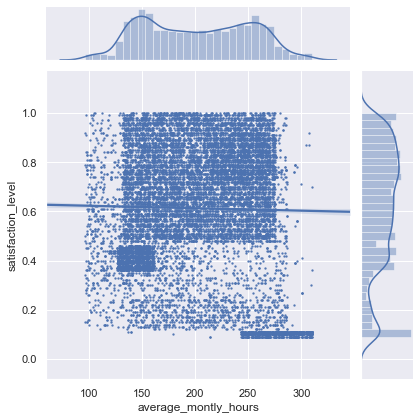

In [65]:
sns.jointplot(x='average_montly_hours',y='satisfaction_level', data=data, kind='reg', size=6, scatter_kws={'s':2})

по графику видно что что ничего не понятно, взаимосвязей нет

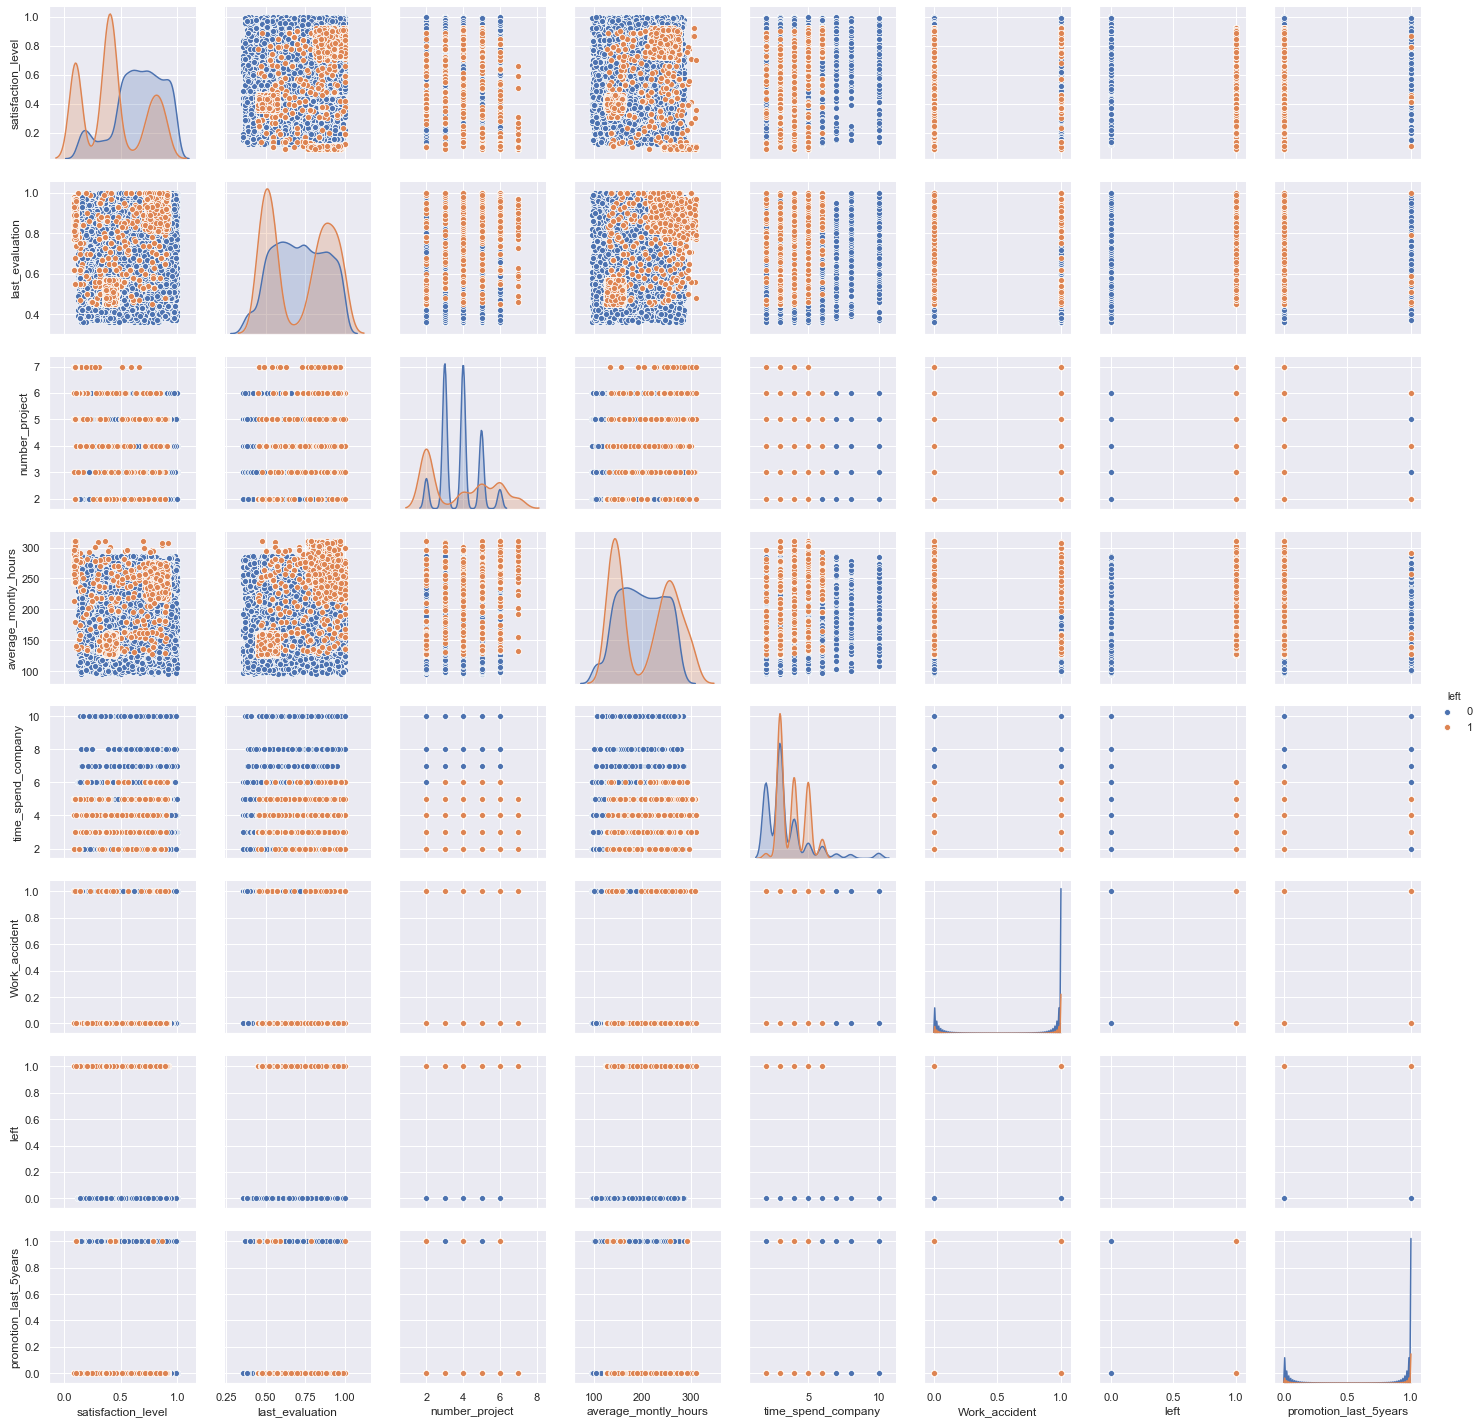

In [66]:
sns.pairplot(data, hue="left")

я сделал обычны паирплот но там плохо видно взаимосвязи, после чего добавил в разделение по ушедшим из компании.
тут уже просматриваются взаимосвязи

# 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [67]:
sts.ttest_ind(data['average_montly_hours'], data['satisfaction_level'])

Ttest_indResult(statistic=491.5064991295991, pvalue=0.0)

In [68]:
sts.ttest_ind(data[data['salary'] == 'high']['average_montly_hours'], data[data['salary'] == 'low']['average_montly_hours'])

Ttest_indResult(statistic=-0.7288680398062308, pvalue=0.4661023478267259)

In [69]:
sts.ttest_ind(data[data['sales'] == 'technical']['satisfaction_level'], data[data['sales'] == 'sales']['satisfaction_level'])

Ttest_indResult(statistic=-1.0538002676687468, pvalue=0.29201149607000193)

тут мы искали взаимосвязи между переменными. там где pvalue < 0.05 есть зависомость друг от друга.

# 6.Рассчитать сколько работников работает в каждом департаменте.

In [70]:
data.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

посчитали кол-во сотрудников в каждом отделе, больше всего сотрудников в отделе продаж(sales), меньше всего управленцев(managment), что вполне логично

# 7.Показать распределение сотрудников по зарплатам.

In [71]:
salary = pd.DataFrame(data.salary.value_counts()).reset_index()
salary

,index,salary
0,low,7316
1,medium,6446
2,high,1237


<BarContainer object of 3 artists>

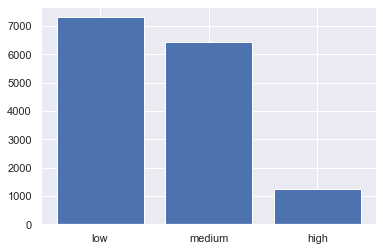

In [72]:
plt.bar(salary['index'], salary['salary'])

наглядная диаграма показывающая несправедливое распределение по зп)) 

# 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

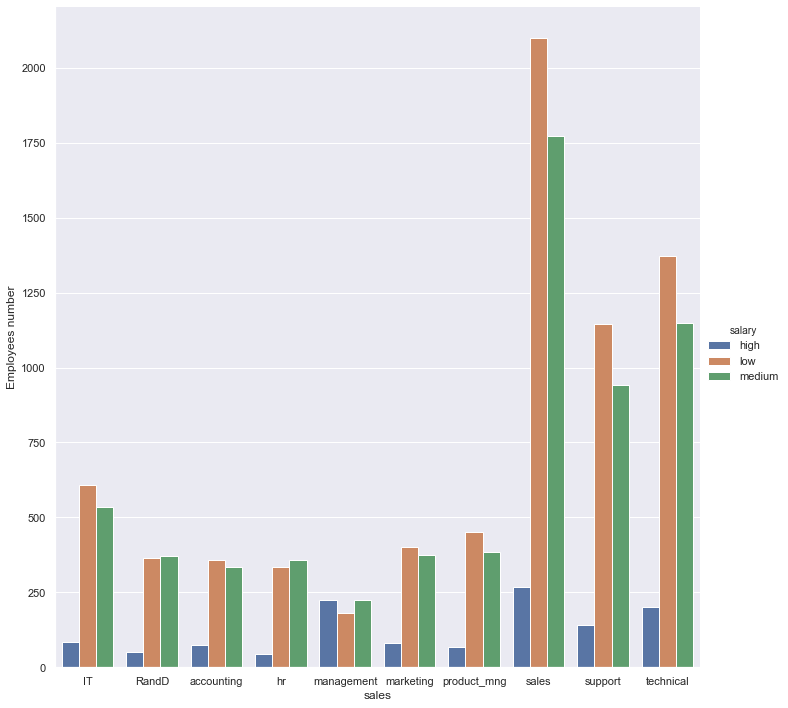

In [73]:
salary_d = data.groupby(['salary', 'sales']).count().reset_index()

sns.set(style="darkgrid")
output = sns.catplot(x="sales", 
                     y = "satisfaction_level", 
                     hue="salary", 
                     data=salary_d,
                     height=10, 
                     kind="bar")
output.set_ylabels("Employees number")

в распределение зарплаты по отделам, видно что в процентном соотношение самое большое кол-во сотрудников получающих хай селари управленцы(менеджмент), а в абсолютном продажники.

# 9.Сколько сотрудников покинули компанию.

In [74]:
print('Компанию покинули', data['left'].sum(),',всего было', data['left'].count())

Компанию покинули 3571 ,всего было 14999


# 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

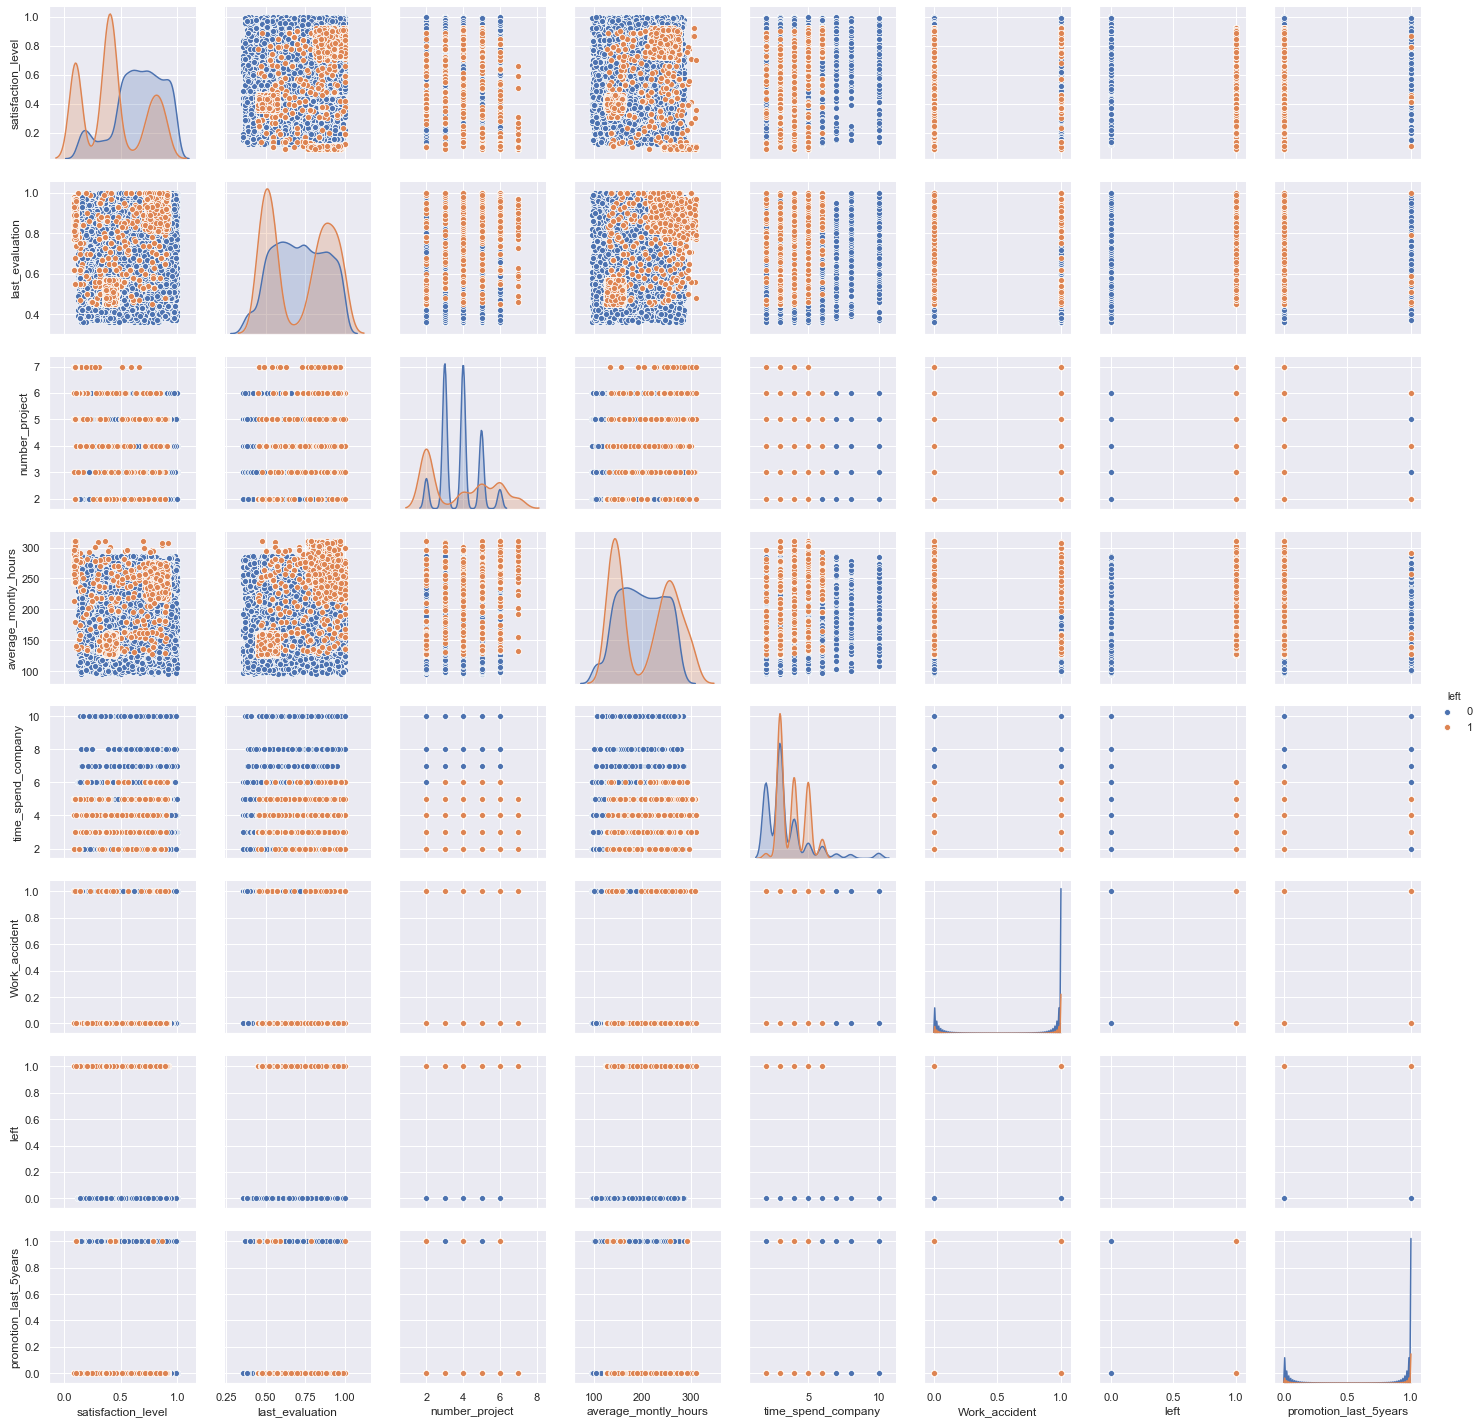

In [75]:
sns.pairplot(data, hue="left")

In [76]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


1- сотрудники покидают компанию из за отсутствие повышений грейда за последние пять лет

2- сотрудники покидают компанию из за низкого уровня удовлетворенности

3- сотрудники покидают компанию из за переработки по количествам часов

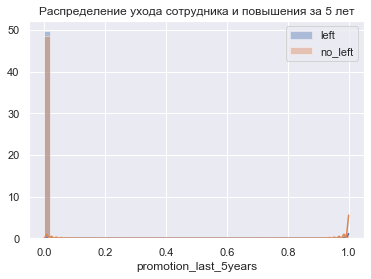

s: -7.581
p:0.000


In [77]:
data_var = ('left','no_left','promotion_last_5years')
data1 =data.loc[data['left']==1][data_var[2]]
data2 =data.loc[data['left']==0][data_var[2]]

sns.distplot(data1)
sns.distplot(data2)
plt.title('Распределение ухода сотрудника и повышения за 5 лет')
plt.legend([data_var[0],data_var[1]])
plt.show()
value = sts.ttest_ind(data1, data2)
print(f's: {value.statistic:.3f}')
print(f'p:{value.pvalue:.3f}')

гипотеза подтверждена p-value = 0. Уход сотрудника связан с отсутствием повышения грейда за последние пять лет

2

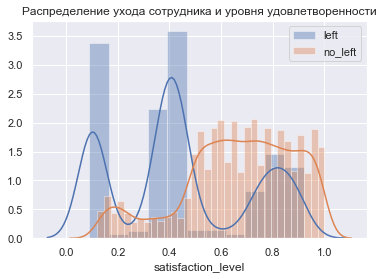

s: -51.613
p:0.000


In [78]:

data_var = ('left','no_left','satisfaction_level')
data1 =data.loc[data['left']==1][data_var[2]]
data2 =data.loc[data['left']==0][data_var[2]]

sns.distplot(data1)
sns.distplot(data2)
plt.title('Распределение ухода сотрудника и уровня удовлетворенности')
plt.legend([data_var[0],data_var[1]])
plt.show()
value = sts.ttest_ind(data1, data2)
print(f's: {value.statistic:.3f}')
print(f'p:{value.pvalue:.3f}')

гипотеза подтверждена p-value = 0. Уход сотрудника связан с уровнем удовлетворенности, чем ниже тем больше шансов что сотрудник уйдет.

3

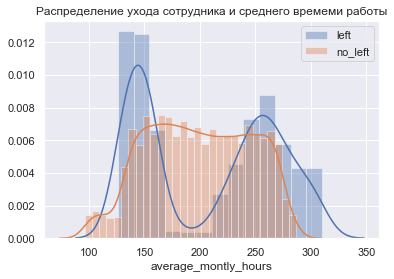

s: 8.752
p:0.000


In [79]:
data_var = ('left','no_left','average_montly_hours')
data1 =data.loc[data['left']==1][data_var[2]]
data2 =data.loc[data['left']==0][data_var[2]]

sns.distplot(data1)
sns.distplot(data2)
plt.title('Распределение ухода сотрудника и среднего времеми работы')
plt.legend([data_var[0],data_var[1]])
plt.show()
value = sts.ttest_ind(data1, data2)
print(f's: {value.statistic:.3f}')
print(f'p:{value.pvalue:.3f}')

гипотеза подтверждена p-value = 0. Уход сотрудника связан с средним временем работы в месяц, либо он уходит потому что он перерабатывает либо, его сокращают когда она работает мало, это как вариант в таблице нет данных "сам сотрудник ушел" или "его уволили".
